In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load training and testing CSV files
train_csv_file_path = '/content/drive/MyDrive/Handwritten/train.csv'
test_csv_file_path = '/content/drive/MyDrive/Handwritten/test.csv'

train_df = pd.read_csv(train_csv_file_path)
test_df = pd.read_csv(test_csv_file_path)

# Extract features (pixel values) and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.values

# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
num_classes = 10  # Assuming 10 classes (digits 0-9)
y_train = pd.get_dummies(y_train, columns=['label'], prefix='label')

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define your model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model
epochs = 10
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate your model on the test set
y_pred = model.predict(X_test)

# y_pred contains the predicted probabilities for each class; you can use these probabilities as needed


Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2867 - accuracy: 0.9195 - val_loss: 0.1855 - val_accuracy: 0.9483
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1174 - accuracy: 0.9644 - val_loss: 0.1592 - val_accuracy: 0.9569
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0732 - accuracy: 0.9766 - val_loss: 0.1484 - val_accuracy: 0.9612
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.1405 - val_accuracy: 0.9644
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.1501 - val_accuracy: 0.9633
Epoch 6/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.1570 - val_accuracy: 0.9646
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.1738 - val_accuracy:

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0224 - accuracy: 0.9940 - val_loss: 0.2403 - val_accuracy: 0.9664
Epoch 2/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.2117 - val_accuracy: 0.9689
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.2202 - val_accuracy: 0.9664
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0156 - accuracy: 0.9958 - val_loss: 0.2269 - val_accuracy: 0.9651
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.2121 - val_accuracy: 0.9683
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.2569 - val_accuracy: 0.9651
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.2932 - val_accuracy:

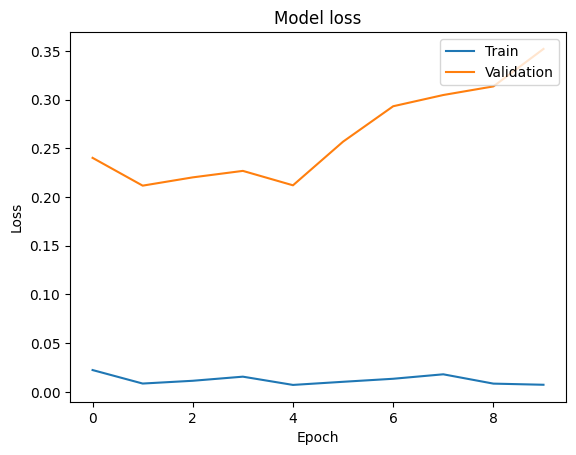

In [6]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


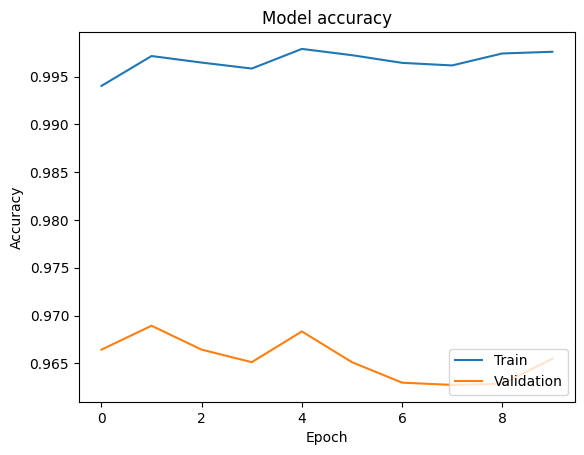

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
